# Numerical Differentiation

As far as finding a derivative analytically is purely technical task, it is also useful to be able to establish some numerical approximations of the derivative (to analyze the trend or the rate of change of some real-life time series, e.g. currency exchange rate, etc.).

Baring that in mind one usually can solve two separate tasks: 
+ finding the derivative of a smooth function (assuming that the smoothness is given)
+ finding the derivative of distorted function (e.g. a signal with some random noise)

## Derivative of smooth functions: Finite Differences

Assume that we have some nice smooth function $f(x)$ on a segment $I$. 

The simplest attempt to find the derivative stems from the definition of the derivative:

$$    
\lim\limits_{h \to 0} \frac{f(a+h)-f(a)}{h}=f'(a) 
$$

Thus we can come up with an idea of the approximation:
$$    
f'(a)\approx \frac{f(a+h)-f(a)}{h}
$$
This formula is called **forward differences**.

### Forward differences implementation

Let me start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions.

In [20]:
import numpy as np
from math import *
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline

Also I import and setup a couple of plotting libraries to make life prettier:

In [3]:
# import seaborn as sns
# sns.set()
# sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 4.0})
# sns.set_palette('cubehelix')

So, first we need to write a function with the following signature:
```
def derForward(f, I, h) 
```
This function should get as an input function $f$ and segment $I$ as Python list of two elements. 

In the function itself we need to divide the segment $I$ into small segments of length $h$, thus getting a grid $x$. The function should return `dy` --- forward differences for each point `x` (except the border since the formula asks for the next value). We should return both `x` and `dy` arrays of the same length.

In [109]:
def derForward(f, I, h):
    start, stop = I
    x = np.linspace(start, stop, h)
    y = f(x)
    dy = np.array([(y[i+1] - y[i]) / (x[i+1] - x[i]) for i in range(len(x)-1)])
    x = x[:-1]
    return x, dy

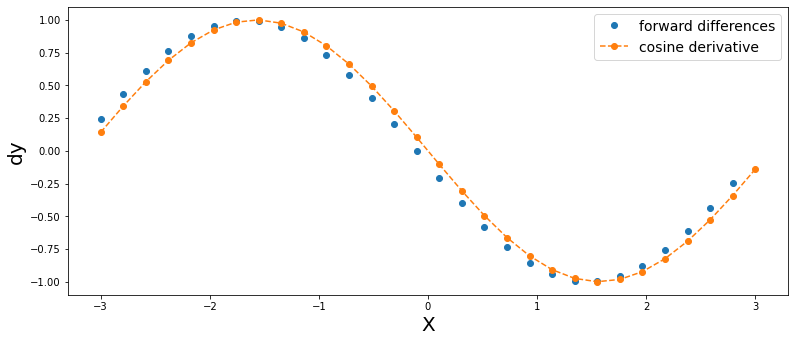

In [208]:
# let's visualize what we've got
f, I, h = np.cos, (-3, 3), 30
x = np.linspace(I[0], I[1], h)
x_forward, dy_forward = derForward(f, I, h)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('dy', fontsize=20)
ax.plot(x_forward, dy_forward, 'o', label='forward differences')
ax.plot(x, -np.sin(x), 'o--', label="cosine derivative")
plt.legend(fontsize=14);

### Task 2. Backward differences

Similarly to forward differences, one can formulate **backward differences**:
$$
f'(a)\approx \frac{f(a)-f(a-h)}{h}
$$

Modify your function to get backward differences. **Note: your `x` should be different since now you ask for previous point!**

In [125]:
def derBackward(f, I, h):
    start, stop = I
    x = np.linspace(start, stop, h)
    y = f(x)
    dy = np.array([(y[i] - y[i-1]) / (x[i] - x[i-1]) for i in range(1, len(x))])
    x = x[1:]
    return x, dy

In [5]:
# def derBackward(f, I, h):
#     # your code goes here
#     x=np.arange(I[0], I[1], h)
#     y=...
#     dy=np.array([(f(x[i-1]) - f(x[i]))/(x[i-1] - x[i])for i in range(1,len(x))])
#     x=x[1:len(x)]
#     return x, dy

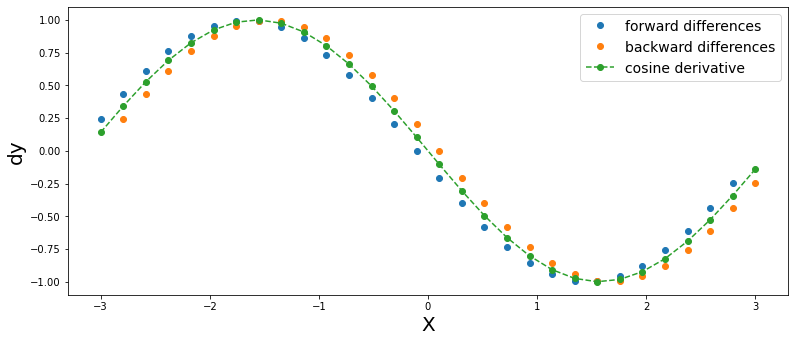

In [207]:
# let's visualize what we've got
f, I, h = np.cos, (-3, 3), 30
x = np.linspace(I[0], I[1], h)

x_forward, dy_forward = derForward(f, I, h)
x_backward, dy_backward = derBackward(f, I, h)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('dy', fontsize=20)
ax.plot(x_forward, dy_forward, 'o', label='forward differences')
ax.plot(x_backward, dy_backward, 'o', label='backward differences')
ax.plot(x, -np.sin(x), 'o--', label='cosine derivative')
plt.legend(fontsize=14);

### Task 3. Symmetrical Differences

Essentially, one could try to bring forward/backward asymmetry together. This method is called **symmetrical differences**:
$$
f'(a) \approx \frac{f(a+h)-f(a-h)}{2h}
$$
Despite the fact we lose two poins now, let us also implement this method (we compare them below):

In [195]:
def derSymmetrical(f, I, h):
    start, stop = I
    x = np.linspace(start, stop, h)
    y = f(x)
    dy = np.array([(y[i+1] - y[i-1]) / (x[i+1] - x[i-1]) for i in range(1, len(x)-1)])
    x = x[1:-1]
    return x, dy

In [7]:
# def derSymmetrical(f, I, h):
#     # your code goes here
#     x=np.arange(I[0], I[1], h)
#     y=...
#     dy=np.array([(f(x[i+1]) - f(x[i-1]))/h*0.5 for i in range(1,len(x)-1)])
#     x=x[1:len(x)-1]
#     return x, dy

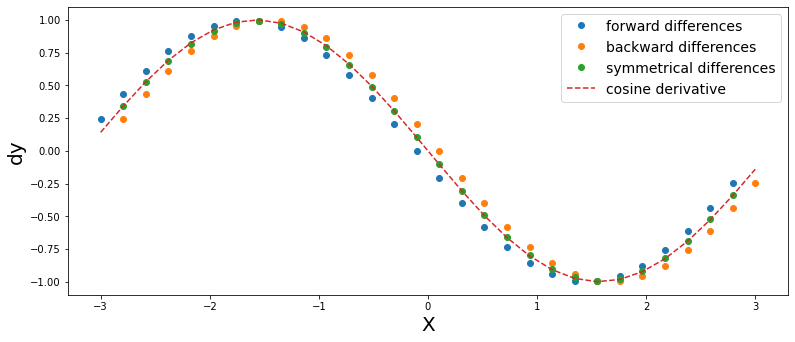

In [210]:
# let's visualize what we've got
f, I, h = np.cos, (-3, 3), 30
x = np.linspace(I[0], I[1], h)

x_forward, dy_forward = derForward(f, I, h)
x_backward, dy_backward = derBackward(f, I, h)
x_symmetrical, dy_symmetrical = derSymmetrical(f, I, h)

fig = plt.figure(figsize=(10, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('dy', fontsize=20)
ax.plot(x_forward, dy_forward, 'o', label='forward differences')
ax.plot(x_backward, dy_backward, 'o', label='backward differences')
ax.plot(x_symmetrical, dy_symmetrical, 'o', label='symmetrical differences')
ax.plot(x, -np.sin(x), '--', label='cosine derivative')
plt.legend(fontsize=14);

**Have you noticed that errors changed?** Let us illustrate it.

## Task 4. Compare by eyes

Assume we want to experiment with $f(x)=\sin(x)$. Let $I=[0, 2\pi]$ and $h=1/10$. Compute:
+ forward differences
+ backward differences
+ symmetrical differences

If we plot all results with the right answer ($f'(x)=\cos(x)$), we should get picture like this:

![target](tmp.png)

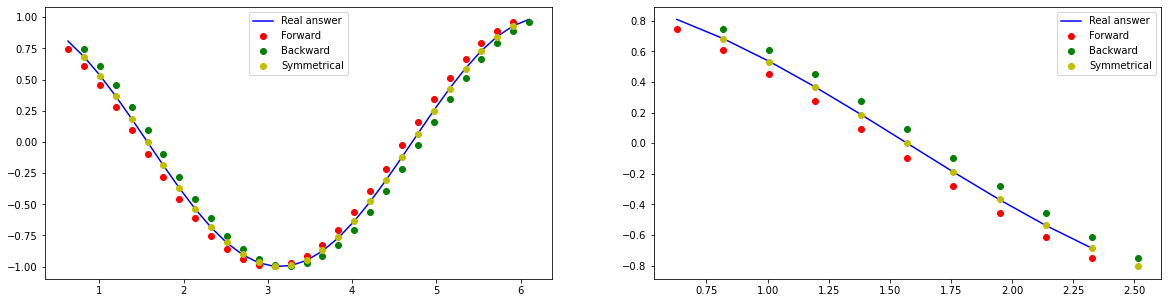

In [237]:
x = np.linspace(0.2*pi, 6.1, 30)
plt.subplots(1, 2, figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(x, np.cos(x), 'b-', label='Real answer')

f, I, h = np.sin, [0.2*pi, 6.1], 30

x_forward, dy_forward=derForward(f, I, h)
x_backward, dy_backward = derBackward(f, I, h)
x_symmetrical, dy_symmetrical = derSymmetrical(f, I, h)

plt.plot(x_forward, dy_forward, 'or', label='Forward')
plt.plot(x_backward, dy_backward, 'og', label='Backward')
plt.plot(x_symmetrical, dy_symmetrical, 'oy', label='Symmetrical')
plt.legend(loc='upper center')

plt.subplot(1, 2, 2)
plt.plot(x[:10], np.cos(x)[:10], 'b-', label='Real answer')
plt.plot(x_forward[:10], dy_forward[:10], 'or', label='Forward')
plt.plot(x_backward[:10], dy_backward[:10], 'og', label='Backward')
plt.plot(x_symmetrical[:10], dy_symmetrical[:10], 'oy', label='Symmetrical')
plt.legend()
plt.show()

**As we have seen by tests above, symmetrical differences are the most accurate.** You can also experiment with $f(x)=x^x$ below:

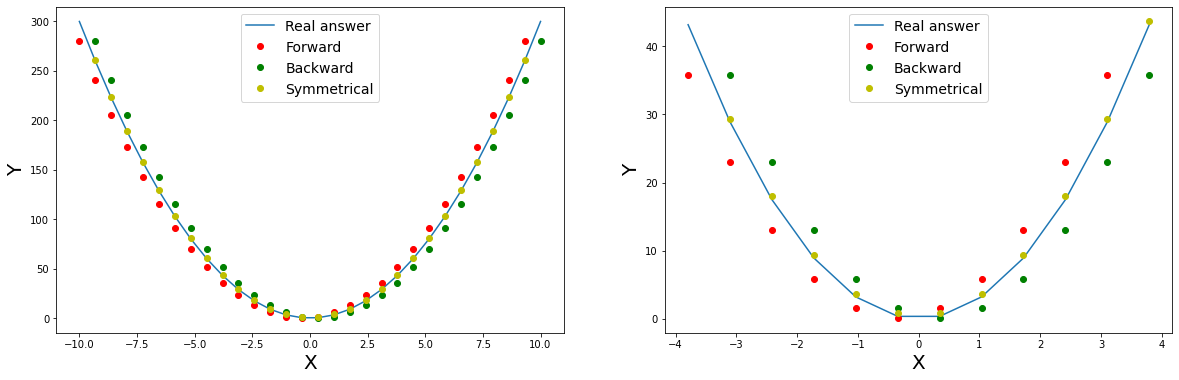

In [290]:
# optional experiment
x = np.linspace(-10, 10, 30)
x_derivative = 3*x**2
f = lambda x: x**3
I = [-10, 10]
h = 30

x_forward, dy_forward = derForward(f, I, h)
x_backward, dy_backward = derBackward(f, I, h)
x_symmetrical, dy_symmetrical = derSymmetrical(f, I, h)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].set_xlabel('X', fontsize=20)
ax[0].set_ylabel('Y', fontsize=20)
ax[0].plot(x, x_derivative, label='Real answer')
ax[0].plot(x_forward, dy_forward, 'or', label='Forward')
ax[0].plot(x_backward, dy_backward, 'og', label='Backward')
ax[0].plot(x_symmetrical, dy_symmetrical, 'oy', label='Symmetrical')
ax[0].legend(loc='upper center', fontsize=14)

ax[1].set_xlabel('X', fontsize=20)
ax[1].set_ylabel('Y', fontsize=20)
ax[1].plot(x[9:21], x_derivative[9:21], label='Real answer')
ax[1].plot(x_forward[9:20], dy_forward[9:20], 'or', label='Forward')
ax[1].plot(x_backward[9:20], dy_backward[9:20], 'og', label='Backward')
ax[1].plot(x_symmetrical[9:20], dy_symmetrical[9:20], 'oy', label='Symmetrical')
ax[1].legend(loc='upper center', fontsize=14);

## Task 5. Error estimation

Using **Taylor expansion**, one can show the following estimations:

1) $ \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

2) $ \left| \frac{f(a)-f(a-h)}{h} -f'(a) \right| \le \frac{h}{2}M  $
where $M=\max_{x\in[a;a+h]} f''(x)$;

3) $ \left| \frac{f(a+h)-f(a-h)}{2h} -f'(a) \right| \le \frac{h^2}{6}M  $
where $M=\max_{x\in[a;a+h]} f'''(x)$;

This is a point-wise estimations, so we will use the maximal of then on the whole segment:
$$
\left| \frac{f(a+h)-f(a)}{h} -f'(a) \right| \to \max_{a\in I} \left| \frac{f(a+h)-f(a)}{h} -f'(a) \right|=Err(h)
$$

For different values of $h$ estimate errors for **forward** and **symmetrical** differences (use $f(x)=\sin(x)$):

In [351]:
steps =[10, 30, 60, 100, 200, 500, 1000]
forward_error = list()
symmetrical_error = list()

f, I = np.sin, (-3, 3)

for h in steps:
    x_forward, dy_forward = derForward(f, I, h)
    forward_error.append(max(dy_forward - np.cos(x_forward)))
    x_symmetrical, dy_symmetrical = derSymmetrical(f, I, h)
    symmetrical_error.append(max(dy_symmetrical - np.cos(x_symmetrical)))

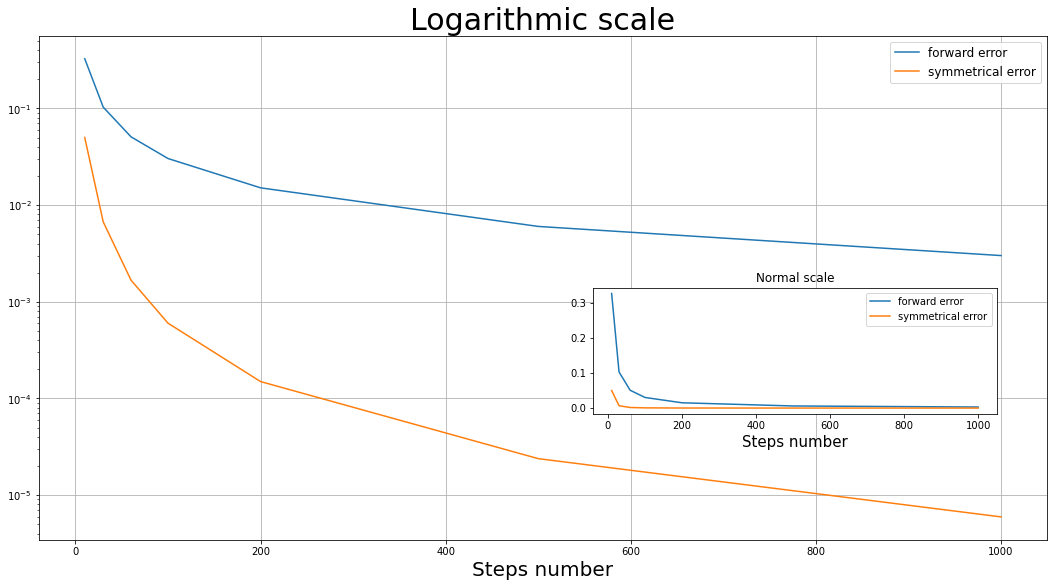

In [354]:
# let's visualize the result using logarithmic scale
fig = plt.figure(figsize=(14, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax1 = fig.add_axes([.55, .25, .4, .25])

ax.grid(True)
ax.set_yscale('log')
ax.plot(steps, forward_error, label='forward error')
ax.plot(steps, symmetrical_error, label='symmetrical error')
ax.legend(fontsize=12)
ax.set_title('Logarithmic scale', fontsize=30)
ax.set_xlabel('Steps number', fontsize=20)

ax1.plot(steps, forward_error, label='forward error')
ax1.plot(steps, symmetrical_error, label='symmetrical error')
ax1.set_title('Normal scale')
ax1.set_xlabel('Steps number', fontsize=15)
ax1.legend();

## Task 6. Derivative of Noised function

Assume that we got somehow noised $\sin(x)$ function from real-life source, e.g.:

In [355]:
x, data=checkerpub.getNoised(n=1000, alpha=0.1, sigma=0.1)
print(np.size(x), np.shape(x), type(x))
print(np.size(data), np.shape(data), type(x))

NameError: name 'checkerpub' is not defined

Here:
+ `n` is a number of points on the $[0, 10]$ segment;
+ `alpha` is a parameter of autoregression; in a way, it refers to the memory of the noise -- how long it "remembers" distorted values; if this parameter is close to $1$, function will sufficiently diverge from the initial $\sin(x)$;
+ `sigma` is the dispersion of the noise.

Let us plot it

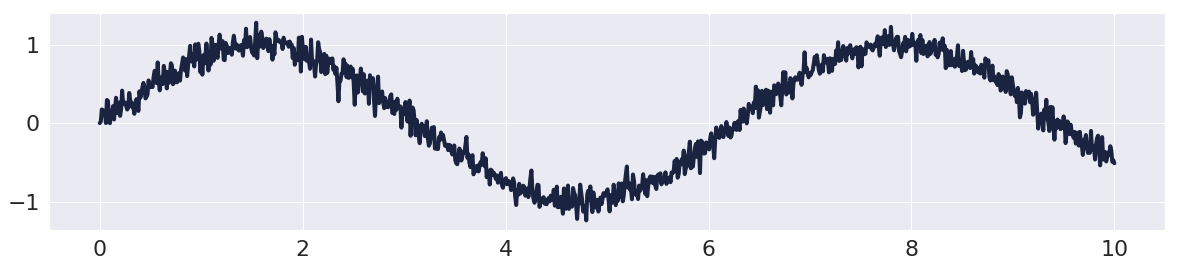

In [19]:
plt.figure(figsize=(20,4))
plt.plot(x, data)
plt.show()

You can try to apply finite differences to this function. The result will be catastrophically large due to the noise: our function stopped being smooth. Hence, we need more stable mechanism of finding a derivative.

The idea is the following:

1. By the definition of differentiability, differentiable function can be approximated by piecewise-linear;

2. Assume we have this approximation. If we consider some heighbourhood of the given point $a$, then the approximation is not _piecewise linear_ --- it is just linear! And it is easy to differentiate linear function.

Formally one should do the following: 

+ we characterize the neightbourhood by half-window length `hw`, thus for the `i`-point in array we are considering `[i-hw:i+hw]` window

+ in such a window one should find the closest approximating line and determine its coefficient; it's an approximation of the derivative

**Note**: you do not need the knowledge of the formula of the coefficient: since we stated here `Linear Regression` problem, you can use already written one

**Note**: you can always choose not to use it, so we write the formula here:
$$
\kappa=\frac{n \sum_{i=1}^n (x_iy_i)-\left( \sum_{i=1}^n x_i \right)\left( \sum_{i=1}^n y_i \right)}{n\sum_{i=1}^n x^2_i-\left( \sum_{i=1}^n x_i \right)^2}
$$


In [19]:
def derWindow(x, y, hw):
    # your code goes here

    return x, df 

In [20]:
# draft
def derWindow(x, y, hw):
    df = []
    for i in range(hw):
        x_new = x[0:hw+i]
        y_new = y[0:hw+i]
        k = (len(x_new) * sum(x_new * y_new) - sum(x_new) * sum(y_new)) / (len(x_new) * sum(x_new**2) - sum(x_new)**2)
        df.append(k)
    for i in range(hw, len(x) - hw, 1):
        x_new = x[i-hw:i+hw]
        y_new = y[i-hw:i+hw]
        k = (len(x_new) * sum(x_new * y_new) - sum(x_new) * sum(y_new)) / (len(x_new) * sum(x_new**2) - sum(x_new)**2)
        df.append(k)
    for i in range(len(x) - hw, len(x), 1):
        x_new = x[i-hw:]
        y_new = y[i-hw:]
        k = (len(x_new) * sum(x_new * y_new) - sum(x_new) * sum(y_new)) / (len(x_new) * sum(x_new**2) - sum(x_new)**2)
        df.append(k)
        
    return x, df 

Let us try to check ourselves. If we choose smooth enough function (e.g. $\sin x$) then our sliding derivative technique should be close to real derivative (with reasonable `hw`). Check your function for different `hw`; you may also change $\sin x$.

In [20]:
x_test=np.linspace(0, 2*np.pi, 10000)
hw=...
y_test=np.sin(x_test)

der_true=np.cos(x_test)

x_new, der_new=derWindow(x_test, y_test, hw)

plt.figure(figsize=(16,6))
plt.plot(x_test, der_true, 'b-', linewidth=4, alpha=0.3)
plt.plot(x_new, dernew, 'r-', linewidth=2)

NameError: name 'df' is not defined

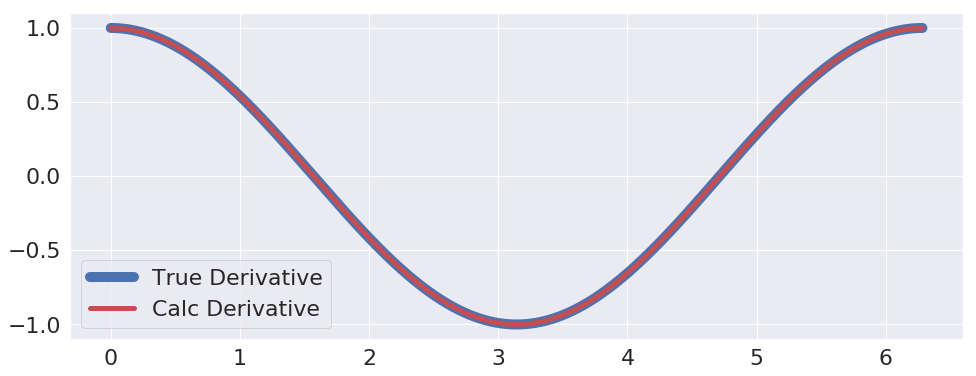

In [21]:
# draft
x_test=np.linspace(0, 2*np.pi, 10000)
hw= 100
y_test=np.sin(x_test)

der_true=np.cos(x_test)
x_new, der_new=derWindow(x_test, y_test, hw)

plt.figure(figsize=(16,6))
plt.plot(x_test, der_true, 'b-', linewidth=10, label = 'True Derivative')
plt.plot(x_new, der_new, 'r-', linewidth=5, label = 'Calc Derivative')
plt.legend()
plt.show()

### Task 7. Plot results

Let us also plot results for three different half-window sizes: 50, 10 and 200.
    
**PLease, try to use different colors and styles to make a nice picture!** You should get something close to:

![](tmp2.png)

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(x, data, alpha=0.2)
plt.plot(x, np.cos(x), 'b')

# your code goes here

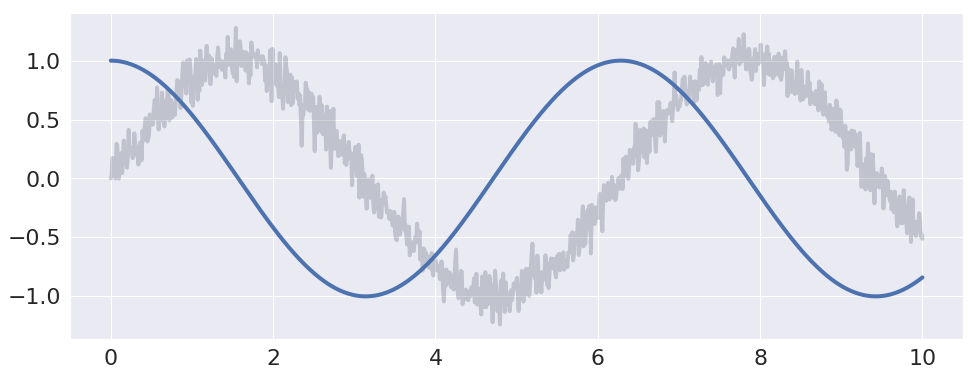

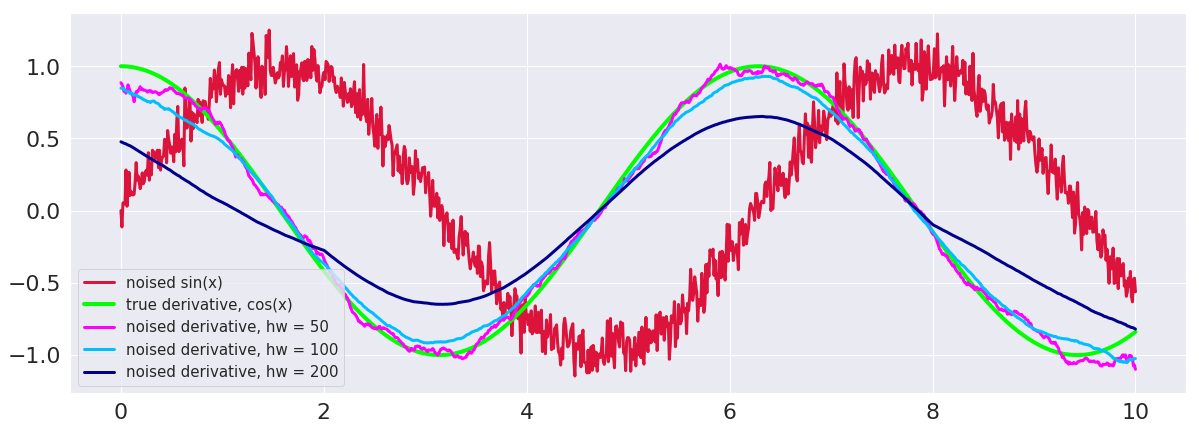

In [22]:
# draft
plt.figure(figsize=(16,6))
plt.plot(x, data, alpha=0.2)
plt.plot(x, np.cos(x), 'b')

# your code goes here
hw_s = [50, 100, 200]
colors = ['#FF00FF', '#00BFFF', '#00008B']
y_lst = []
x, data=checkerpub.getNoised(n=1000, alpha=0.1, sigma=0.1)
der_true=np.cos(x)
for hw in hw_s:
    x_new, der_new = derWindow(x, data, hw)
    y_lst.append(der_new)

plt.figure(figsize=(20,7))
plt.plot(x, data, color = '#DC143C', linewidth = 3, label = 'noised sin(x)')
plt.plot(x, der_true, color = '#00FF00', linewidth = 4, label = 'true derivative, cos(x)')
for y, color, hw in zip(y_lst, colors, hw_s):
    plt.plot(x, y, color = color, linewidth = 3, label = f'noised derivative, hw = {hw}')
plt.legend(prop={'size': 15}, loc = 3)
plt.show()
    


It is also interesting to play with different `alpha` and `sigma`. You are welcome to do it here:

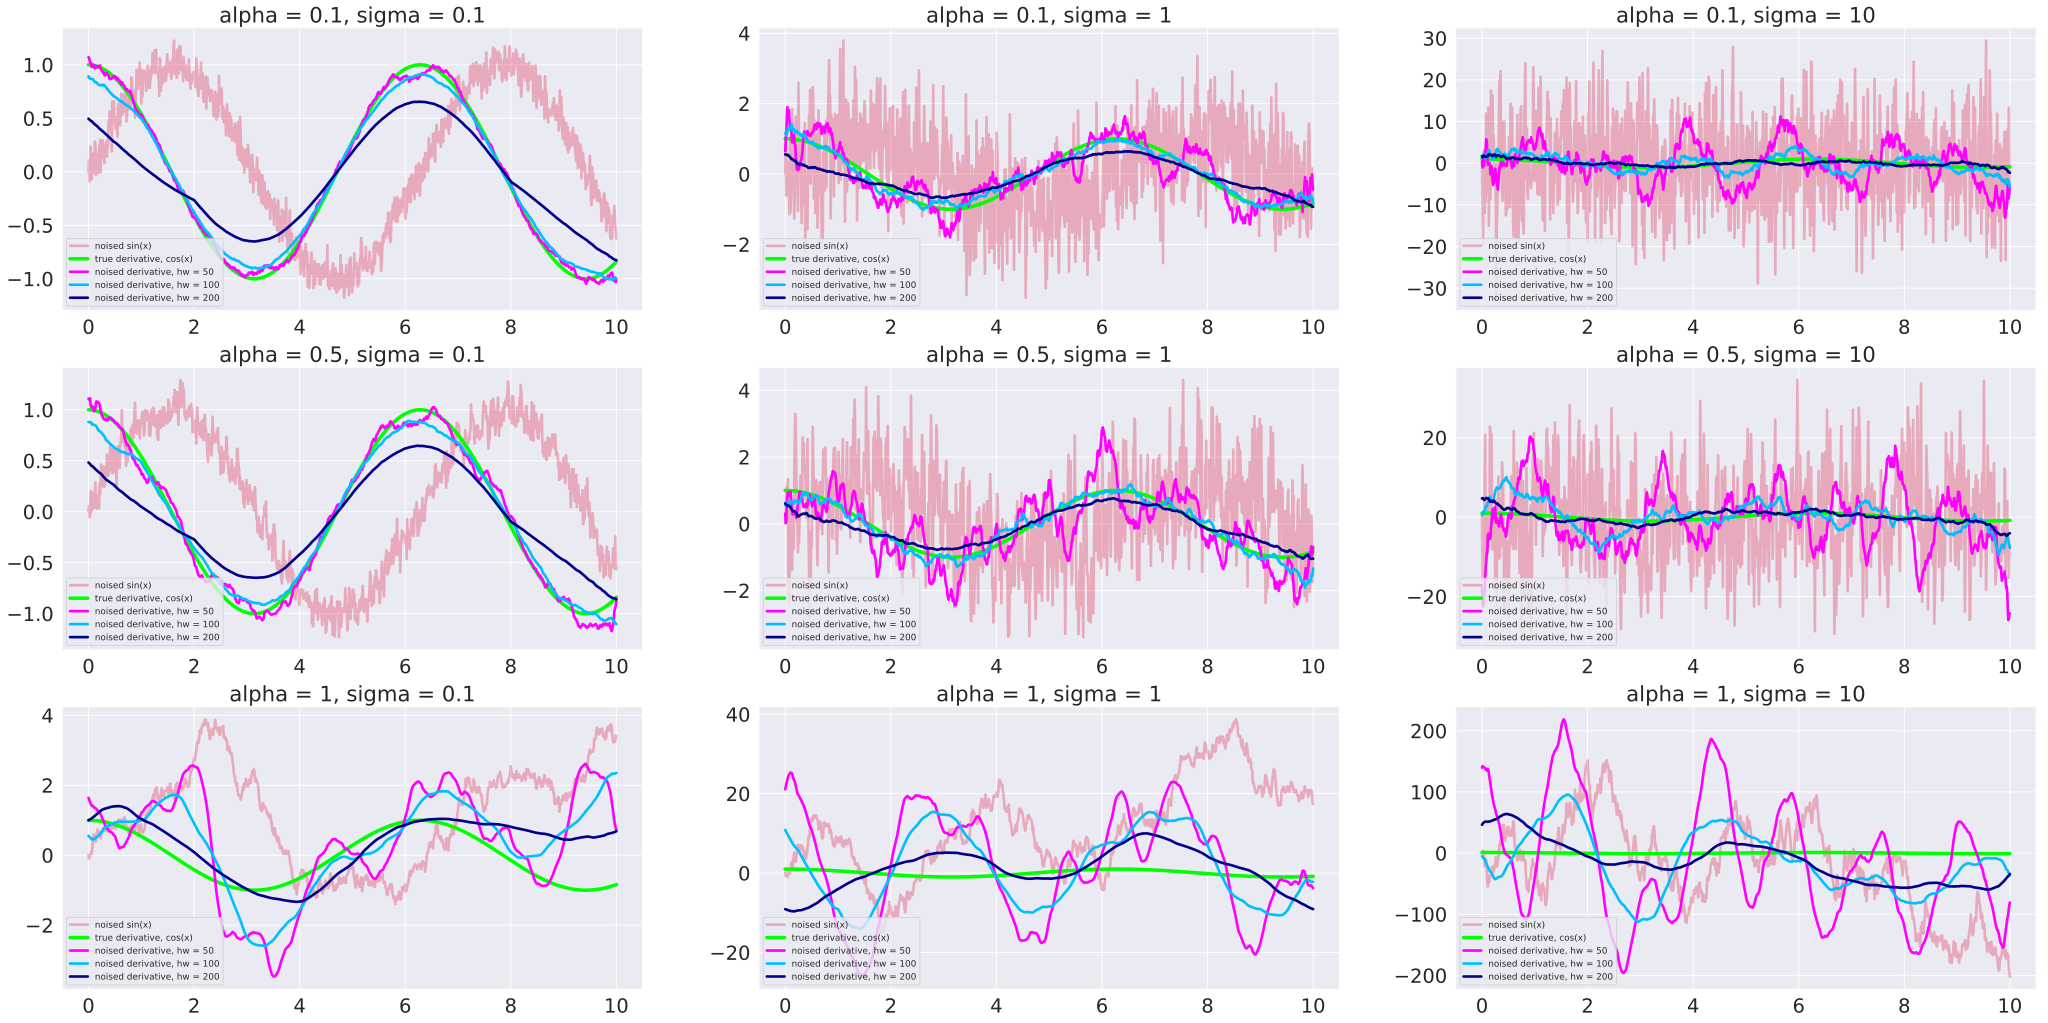

In [25]:
# optional experiment
# your code goes here
%config InlineBackend.figure_format = 'svg'
fig, axs = plt.subplots(3, 3, figsize=(40, 20))
i, j = 0, 0
hws = [50, 100, 200]
alphas = [0.1, 0.5, 1]
sigmas  = [0.1, 1, 10]
colors = ['#FF00FF', '#00BFFF', '#00008B']
plot_data = dict()
der_true=np.cos(x)
for alpha in alphas:
    plot_data[f'alpha={str(alpha)}'] = dict()
    for sigma in sigmas:
        x, data=checkerpub.getNoised(n=1000, alpha = alpha, sigma = sigma)
        axs[i][j].plot(x, data, color = '#DC143C', linewidth = 3, label = f'noised sin(x)', alpha=0.3)
        axs[i][j].plot(x, np.cos(x), color = '#00FF00', linewidth = 4, label = 'true derivative, cos(x)')
        der_with_hws = []
        for hw, c in zip(hws, colors):
            x_new, der_new = derWindow(x, data, hw)
            der_with_hws.append(der_new)
            axs[i][j].plot(x, der_new, color = c, linewidth = 3, label = f'noised derivative, hw = {hw}')
        plot_data[f'alpha={str(alpha)}'][f'sigma={str(sigma)}'] = der_with_hws
        axs[i][j].legend(prop={'size': 10}, loc = 3)
        axs[i][j].set_title(f'alpha = {alpha}, sigma = {sigma}')
        j += 1
    i += 1
    j = 0
fig.savefig('sigma-alpha research.png')



## Task 8. Results

Please, answer the following questions:

1. Does theoretical estimations of the error coincide with your experiments? If there is a divergence from a straight line, how can it be explained?

2. What can you say about optimal window length in the last part of the experiment? Is there any monotonic behaviour?

1. The actual errors, almost always, do not exceed the theoretical ones. The overestimation actually occurs of a very small order. This behavior can be explained by the representation of a number in Python. 

2. The optimal parameter for the window, apparently, depends on the function itself and is selected in each case by exhaustive search. The quality of the derivative decreases after hw becomes larger than a number located in the interval (50, 100) - this can be called a monotonic decline in the quality of approximation. 